<a href="https://colab.research.google.com/github/Riaj509/Thesis-Fake-News-detection-using-transform-model/blob/main/bangla_bert_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install bnlp_toolkit
! pip install banglanltk
! pip install bnltk

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.4 MB/s eta 0:00:00


In [ ]:
! pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.0 MB/s eta 0:00:00


In [ ]:
from bs4 import BeautifulSoup
from bnlp.corpus.util import remove_stopwords
from bnltk.stemmer import BanglaStemmer
import banglanltk as bn

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import seaborn as sns
import re 
import string
import matplotlib.pylab as plt
from collections import Counter
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Input, Dense, GRU, Embedding
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [ ]:

import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/tst/final_20k.csv')

In [ ]:
df.head()

,text,label
0,শঙ্কামুক্ত পান্ডিয়া | এশিয়া কাপের ভারত-পাকিস্ত...,1.0
1,কাল বিশ্ব পর্যটন দিবস | আগামীকাল বিশ্ব পর্যটন ...,1.0
2,খালেদা জিয়ার জামিনের মেয়াদ বাড়ল | জিয়া অরফানেজ...,1.0
3,বিশ্ব মিডিয়ায় ২১ আগস্ট মামলার রায় | ২০০৪ সালে ...,1.0
4,উপ-অঞ্চল সেরা হল আজিম মেমোরিয়াল উচ্চ বিদ্যালয় ...,1.0


In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits

In [ ]:
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

In [ ]:
def bn_lemmatization(text):
    return bn.stemmer(text)
def remove_bn_stopwords(text):
    final_text = []
    text = remove_stopwords(text, stopwords)
    for word in text:
      text = remove_stopwords(word, stopwords)
      final_text.append(word)
    return " ".join(final_text)

In [ ]:
def cleaning(text):
    text = remove_bn_stopwords(text)
    text = remove_punctuation(text)
    text = bn_lemmatization(text)
    return text
df['text']=df['text'].apply(cleaning)

<ipython-input-12-c7ee4a5502b9>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
df.head()

,text,label
0,শঙ্কামুক্ত পান্ডিয়া এশিয়া কাপের ভারত পাকিস্তান...,1.0
1,কাল বিশ্ব পর্যটন দিবস আগামীকাল বিশ্ব পর্যটন দি...,1.0
2,খালেদা জিয়ার জামিনের মেয়াদ বাড়ল জিয়া অরফানেজ ট...,1.0
3,বিশ্ব মিডিয়ায় ২১ আগস্ট মামলার রায় ২০০৪ সালে ২১...,1.0
4,উপ অঞ্চল সেরা আজিম মেমোরিয়াল উচ্চ বিদ্যালয় ক্র...,1.0


In [ ]:
from transformers import BertTokenizer
from transformers import TFBertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base')

In [ ]:
bangla_model = TFBertModel.from_pretrained('sagorsarker/bangla-bert-base')

Some layers from the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at sagorsarker/bangla-bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
max_len=40
sentences=df["text"]
labels=df["label"]
len(sentences),len(labels)

(20000, 20000)

In [ ]:
mbert_input=tokenizer.encode_plus(sentences[0],add_special_tokens = True,max_length =max_len,pad_to_max_length = True,truncation=True)
mbert_input

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'input_ids': [101, 2893, 12351, 14813, 20379, 2490, 6231, 7724, 2050, 8822, 7724, 8446, 2269, 70638, 2388, 14917, 3110, 7724, 7464, 8008, 3710, 79419, 2094, 71923, 7052, 4778, 74815, 14979, 5562, 28908, 3547, 2617, 19362, 12499, 6695, 5756, 2429, 10518, 11544, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.decode(mbert_input['input_ids'])

'[CLS] শঙকামকত পানডিযা এশিযা কাপের ভারত পাকিসতান মযাচ চলাকালীন ইনজরিতে পডেন টিম ইনডিযার অনযতম সেরা অসতর পেসার অলরাউনডার [SEP]'

In [ ]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    mbert_input_shape=tokenizer.encode_plus(
        sent,add_special_tokens = True,
        max_length =max_len,
        pad_to_max_length = True,
        return_attention_mask = True,
        truncation=True)
    input_ids.append(mbert_input_shape['input_ids'])
    attention_masks.append(mbert_input_shape['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

In [ ]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
 def create_model():
    #two input input_shape and masks
    input_shape = Input(shape = (max_len,), dtype='int64')
    masks= Input(shape = (max_len,), dtype='int64')
    bangla = bangla_model(input_shape, attention_mask=masks)[1] # pooler_output->2D
    dense = Dense(512,activation='relu')(bangla)
    dropout= Dropout(0.5)(dense)
    pred = Dense(2, activation='softmax')(dropout)
    model = tf.keras.Model(inputs=[input_shape,masks], outputs=pred)
    print(model.summary())
    return model   

In [ ]:
model=create_model()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 tf_bert_model_2 (TFBertModel)  TFBaseModelOutputWi  164396544   ['input_9[0][0]',                
                                thPoolingAndCrossAt               'input_10[0][0]']               
                                tentions(last_hidde                                               
                                n_state=(None, 40,                                          

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss=loss,optimizer=optimizer, metrics=[metric])

In [ ]:
history=model.fit([X_train_input,train_mask],Y_train_label,batch_size=32,epochs=10,validation_data=([X_test_input,test_mask],Y_test_label))

Epoch 1/10
500/500 [==============================] - 189s 293ms/step - loss: 0.6638 - accuracy: 0.6030 - val_loss: 0.5323 - val_accuracy: 0.7210
Epoch 2/10
500/500 [==============================] - 141s 282ms/step - loss: 0.4609 - accuracy: 0.7836 - val_loss: 0.4129 - val_accuracy: 0.8307
Epoch 3/10
500/500 [==============================] - 140s 281ms/step - loss: 0.2728 - accuracy: 0.8928 - val_loss: 0.3617 - val_accuracy: 0.8730
Epoch 4/10
500/500 [==============================] - 140s 280ms/step - loss: 0.1702 - accuracy: 0.9380 - val_loss: 0.3524 - val_accuracy: 0.8825
Epoch 5/10
500/500 [==============================] - 141s 282ms/step - loss: 0.1259 - accuracy: 0.9572 - val_loss: 0.4284 - val_accuracy: 0.8763
Epoch 6/10
500/500 [==============================] - 140s 281ms/step - loss: 0.1001 - accuracy: 0.9629 - val_loss: 0.4524 - val_accuracy: 0.8700
Epoch 7/10
500/500 [==============================] - 141s 281ms/step - loss: 0.0895 - accuracy: 0.9642 - val_loss: 0.4743 -

In [ ]:
prediction= model.predict([X_test_input,test_mask],batch_size=32)
pred_labels = prediction.argmax(axis=1)
accuracy_score(Y_test_label,pred_labels)*100

125/125 [==============================] - 12s 79ms/step


89.325

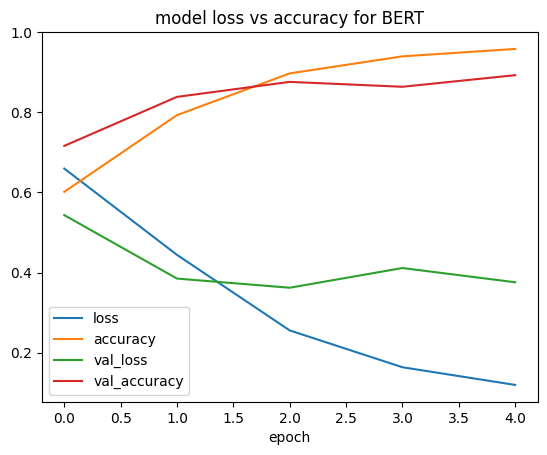

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_loss'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model loss vs accuracy for BERT')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy','val_loss','val_accuracy' ])
pyplot.show() 

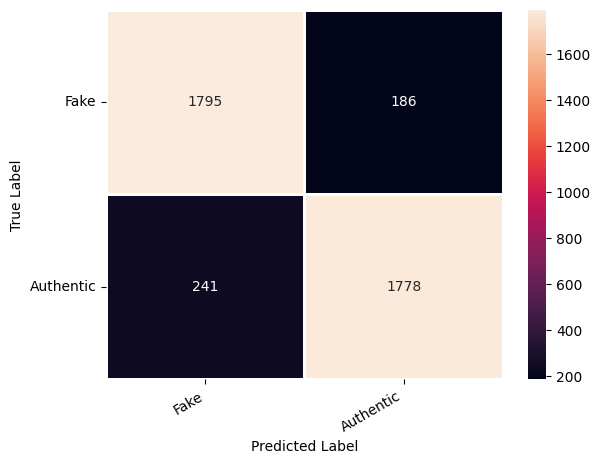

In [ ]:
class_names=['Fake','Authentic']
def show_confusion_matrix(confusion_matrix):
  # hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap = sns.heatmap(confusion_matrix, linewidths=1, annot=True, fmt='g')
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label');
cm = confusion_matrix(Y_test_label, pred_labels)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
print('Classification Report\n')
print(classification_report(Y_test_label,pred_labels))

Classification Report

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1981
         1.0       0.91      0.88      0.89      2019

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

